In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('delhiaqi.csv')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [3]:
df.shape

(561, 9)

In [4]:
df.info()
#wrt output since total entries is 561, therefore there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [5]:
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [6]:
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [7]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.info() 
#converting the date's data type from object to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB


In [9]:
df.loc[0,'date'].day_name()

'Sunday'

In [10]:
df.groupby(pd.Grouper(key='date', axis=0, freq='1W', sort=True))['co'].mean()

date
2023-01-01    5929.152500
2023-01-08    4190.683333
2023-01-15    3649.632381
2023-01-22    3262.321369
2023-01-29    4019.390606
Freq: W-SUN, Name: co, dtype: float64

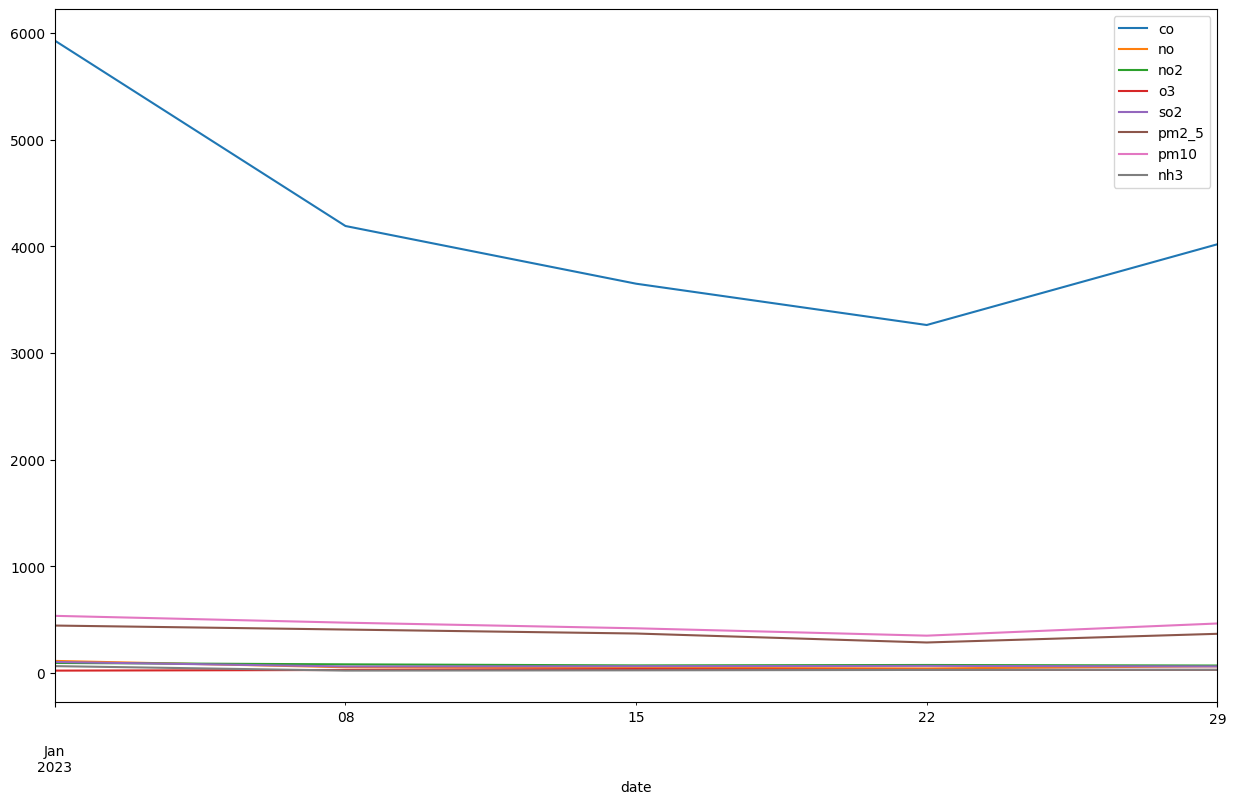

In [11]:
wm_co = df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['co'].mean()
wm_no = df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['no'].mean()
wm_no2= df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['no2'].mean()
wm_o3 = df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['o3'].mean()
wm_so2 = df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['so2'].mean()
wm_pm2_5 = df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['pm2_5'].mean()
wm_pm10 = df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['pm10'].mean()
wm_nh3 = df.groupby(pd.Grouper(key='date', freq='1W',sort=True))['nh3'].mean()
plt.figure(figsize=(9,9))


wm_co.plot(kind='line', figsize=(15,9))
wm_no.plot(kind='line')
wm_no2.plot(kind='line')
wm_o3.plot(kind='line')
wm_so2.plot(kind='line')
wm_pm2_5.plot(kind='line')
wm_pm10.plot(kind='line')
wm_nh3.plot(kind='line')
plt.legend()
plt.show()

Regarding to the weekly concentration (mean, each week) of each pollutants:
1. CO (carbon monoxide) has their conc ranging from 3000-6000 ppm range
2. while the other pollutants have their concentrations remaining within 0-1000 ppm range

In [12]:
df['hour']=df.date.dt.hour
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,4


<Axes: xlabel='hour'>

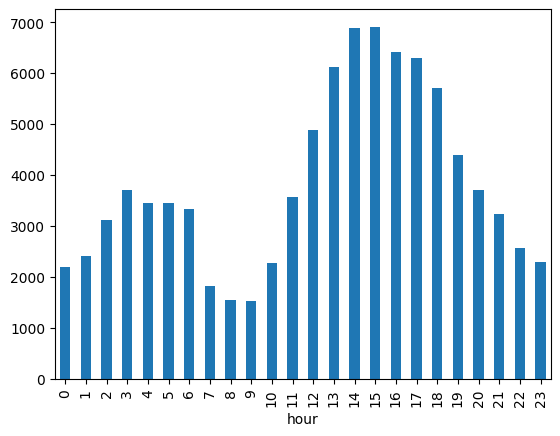

In [13]:
h_co=df.groupby('hour')['co'].mean()

h_co.plot(kind='bar')

<Axes: xlabel='hour'>

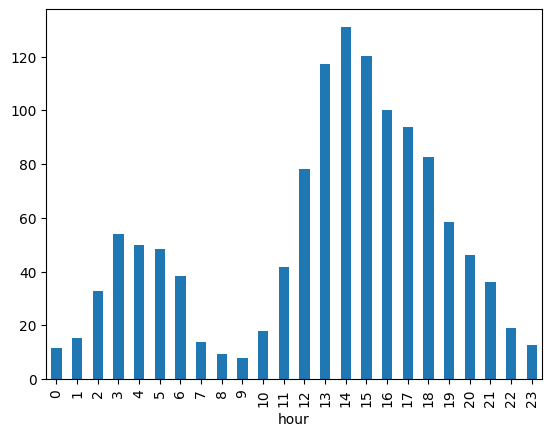

In [14]:
h_no=df.groupby('hour')['no'].mean()
h_no.plot(kind='bar')

<Axes: xlabel='hour'>

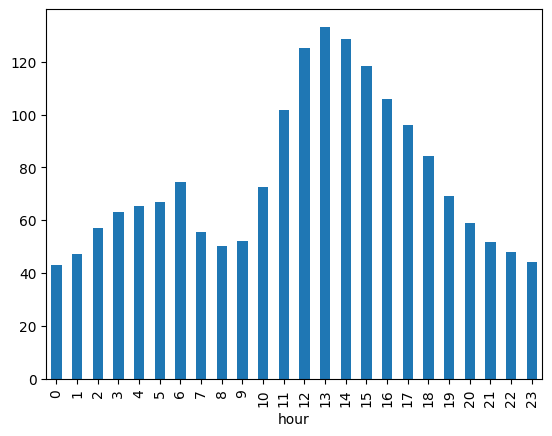

In [15]:
h_no2=df.groupby('hour')['no2'].mean()

h_no2.plot(kind='bar')

<Axes: xlabel='hour'>

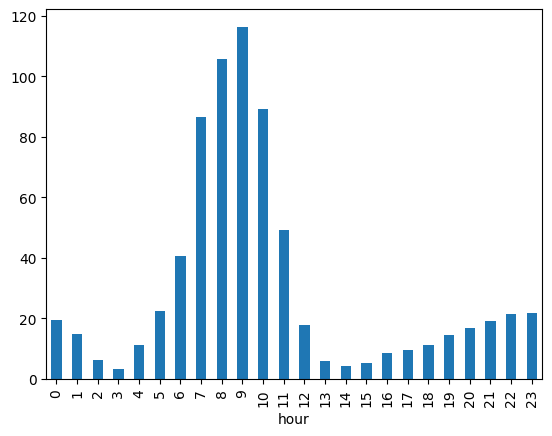

In [16]:
h_o3=df.groupby('hour')['o3'].mean()

h_o3.plot(kind='bar')

<Axes: xlabel='hour'>

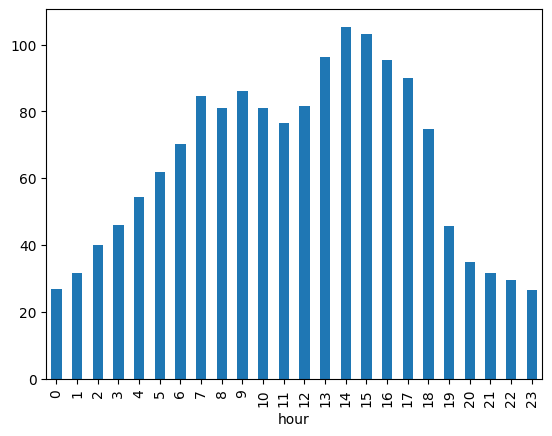

In [17]:
h_so2=df.groupby('hour')['so2'].mean()

h_so2.plot(kind='bar')

<Axes: xlabel='hour'>

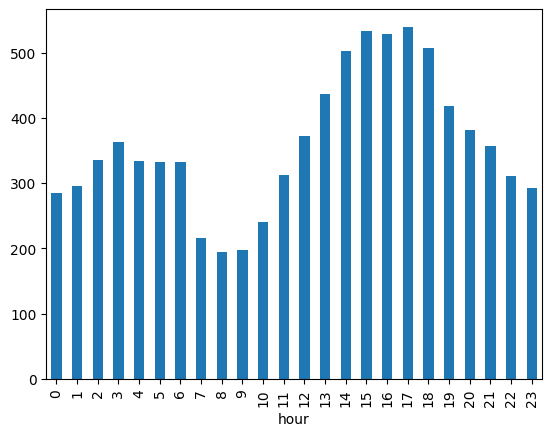

In [18]:
h_pm2_5=df.groupby('hour')['pm2_5'].mean()

h_pm2_5.plot(kind='bar')

<Axes: xlabel='hour'>

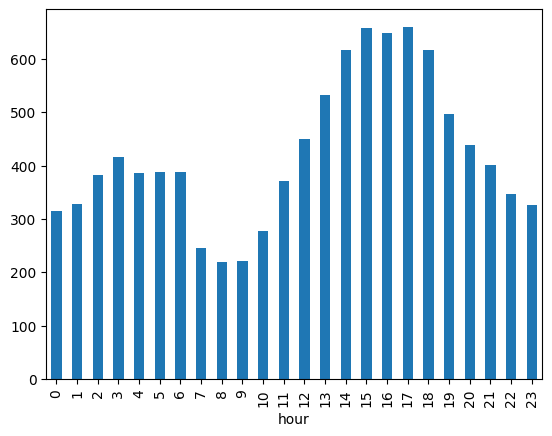

In [19]:
h_pm10=df.groupby('hour')['pm10'].mean()

h_pm10.plot(kind='bar')

<Axes: xlabel='hour'>

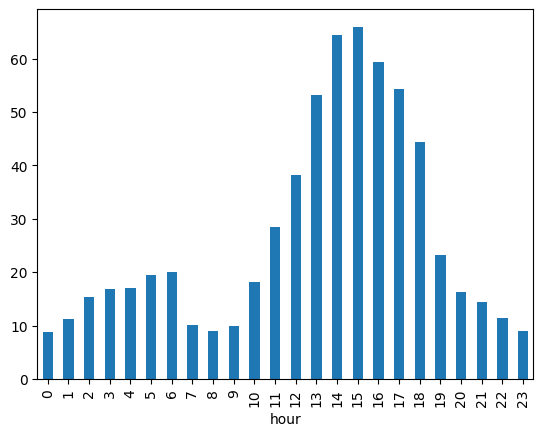

In [20]:
h_nh3=df.groupby('hour')['nh3'].mean()

h_nh3.plot(kind='bar')

In [31]:
pollutants=['co','no','no2', 'o3', 'so2','pm2_5', 'pm10', 'nh3']

corr_mat=df[pollutants].corr()

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(corr_mat, annot=True, cmap='Reds', linewidths=2.0)
plt.title('Correlation Heatmap of Pollutants', fontsize=16)

plt.show()

co related to pm10, pm 2.5, no

In [85]:
df["PM10_24hr_avg"] = df.groupby("date")["pm10"].rolling(window = 24, min_periods = 1).mean().values
df["PM2.5_24hr_avg"] = df.groupby("date")["pm2_5"].rolling(window = 24, min_periods = 1).mean().values
df["SO2_24hr_avg"] = df.groupby("date")["so2"].rolling(window = 24, min_periods = 1).mean().values
df["NOx_24hr_avg"] = df.groupby("date")["no2"].rolling(window = 24, min_periods = 1).mean().values
df["NH3_24hr_avg"] = df.groupby("date")["nh3"].rolling(window = 24, min_periods = 1).mean().values
df["CO_8hr_max"] = df.groupby("date")["co"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("date")["o3"].rolling(window = 8, min_periods = 1).max().values

In [108]:
def get_PM25_subindex(x):
    breakpoints = [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
                   (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)]
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= x <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (x - bp_lo) + i_lo
    return None


In [109]:
def get_PM10_subindex(x):
    breakpoints = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
                   (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)]
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= x <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (x - bp_lo) + i_lo
    return None


In [110]:
def get_NO2_subindex(x):
    breakpoints = [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
                   (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)]
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= x <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (x - bp_lo) + i_lo
    return None


In [111]:
def get_SO2_subindex(x):
    breakpoints = [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
                   (381, 800, 201, 300), (801, 1600, 301, 400), (1601, 2100, 401, 500)]
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= x <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (x - bp_lo) + i_lo
    return None


In [112]:
def get_CO_subindex(x):
    breakpoints = [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200),
                   (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)]
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= x <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (x - bp_lo) + i_lo
    return None


In [113]:
def get_O3_subindex(x):
    breakpoints = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200),
                   (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)]
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= x <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (x - bp_lo) + i_lo
    return None


In [114]:
def get_NH3_subindex(x):
    breakpoints = [(0, 200, 0, 50), (201, 400, 51, 100), (401, 800, 101, 200),
                   (801, 1200, 201, 300), (1201, 1800, 301, 400), (1801, 2400, 401, 500)]
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= x <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (x - bp_lo) + i_lo
    return None


In [116]:
df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(get_PM25_subindex)
df["PM10_SubIndex"]  = df["PM10_24hr_avg"].apply(get_PM10_subindex)
df["NOx_SubIndex"]   = df["NOx_24hr_avg"].apply(get_NO2_subindex)
df["SO2_SubIndex"]   = df["SO2_24hr_avg"].apply(get_SO2_subindex)
df["CO_SubIndex"]    = df["CO_8hr_max"].apply(get_CO_subindex)
df["O3_SubIndex"]    = df["O3_8hr_max"].apply(get_O3_subindex)
df["NH3_SubIndex"]   = df["NH3_24hr_avg"].apply(get_NH3_subindex)


In [117]:
df["Checks"] = (
    (df["PM2.5_SubIndex"] > 0).astype(int) +
    (df["PM10_SubIndex"] > 0).astype(int) +
    (df["SO2_SubIndex"] > 0).astype(int) +
    (df["NOx_SubIndex"] > 0).astype(int) +
    (df["NH3_SubIndex"] > 0).astype(int) +
    (df["CO_SubIndex"] > 0).astype(int) +
    (df["O3_SubIndex"] > 0).astype(int)
)


In [118]:
df["AQI_calculated"] = df[[
    "PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
    "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"
]].max(axis=1).round()


In [119]:
def get_AQI_bucket(x):
    if pd.isna(x): return np.nan
    if x <= 50: return "Good"
    elif x <= 100: return "Satisfactory"
    elif x <= 200: return "Moderate"
    elif x <= 300: return "Poor"
    elif x <= 400: return "Very Poor"
    else: return "Severe"

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(get_AQI_bucket)


In [124]:
df[~df["AQI_calculated"].isna()][[
    "date", "AQI_calculated", "AQI_bucket_calculated"
]].head(25)


,date,AQI_calculated,AQI_bucket_calculated
0,2023-01-01 00:00:00,338.059767,Very Poor
1,2023-01-01 01:00:00,348.458605,Very Poor
2,2023-01-01 02:00:00,377.168605,Very Poor
3,2023-01-01 03:00:00,401.755422,Severe
4,2023-01-01 04:00:00,407.106988,Severe
5,2023-01-01 05:00:00,411.154458,Severe
6,2023-01-01 06:00:00,418.653012,Severe
7,2023-01-01 07:00:00,330.032326,Very Poor
8,2023-01-01 08:00:00,311.276047,Very Poor
9,2023-01-01 09:00:00,310.37814,Very Poor


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a time step column
df['time_step'] = range(len(df))

# Set up input (X) and output (y)
X = df[['time_step']]  # must be 2D
y = df['co']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict CO values
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, y, label='Actual CO', color='blue', linewidth=1.5)
plt.plot(df.index, y_pred, label='Predicted CO (Trend)', color='red', linestyle='--')
plt.title('CO Levels Over Time with Linear Trend')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


From morning of 9AM to 2PM WE SEE A SUDDEN SSURGE IN THE CO LEVELS AS COMAPRED TO ANY OTHER POLLUTANTS, decreases a 


In [ ]:
print(daily_avg.index)

In [ ]:
df.isnull().sum()              